In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [2]:
#load data
df = pd.read_csv('sustainable-energy.csv')
df.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [5]:
df.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [6]:
#target count
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove("Value_co2_emissions_kt_by_country")
num_features


['Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

In [7]:
cat_features = df.select_dtypes(include=[object]).columns.tolist()
cat_features


['Entity', 'Density\\n(P/Km2)']

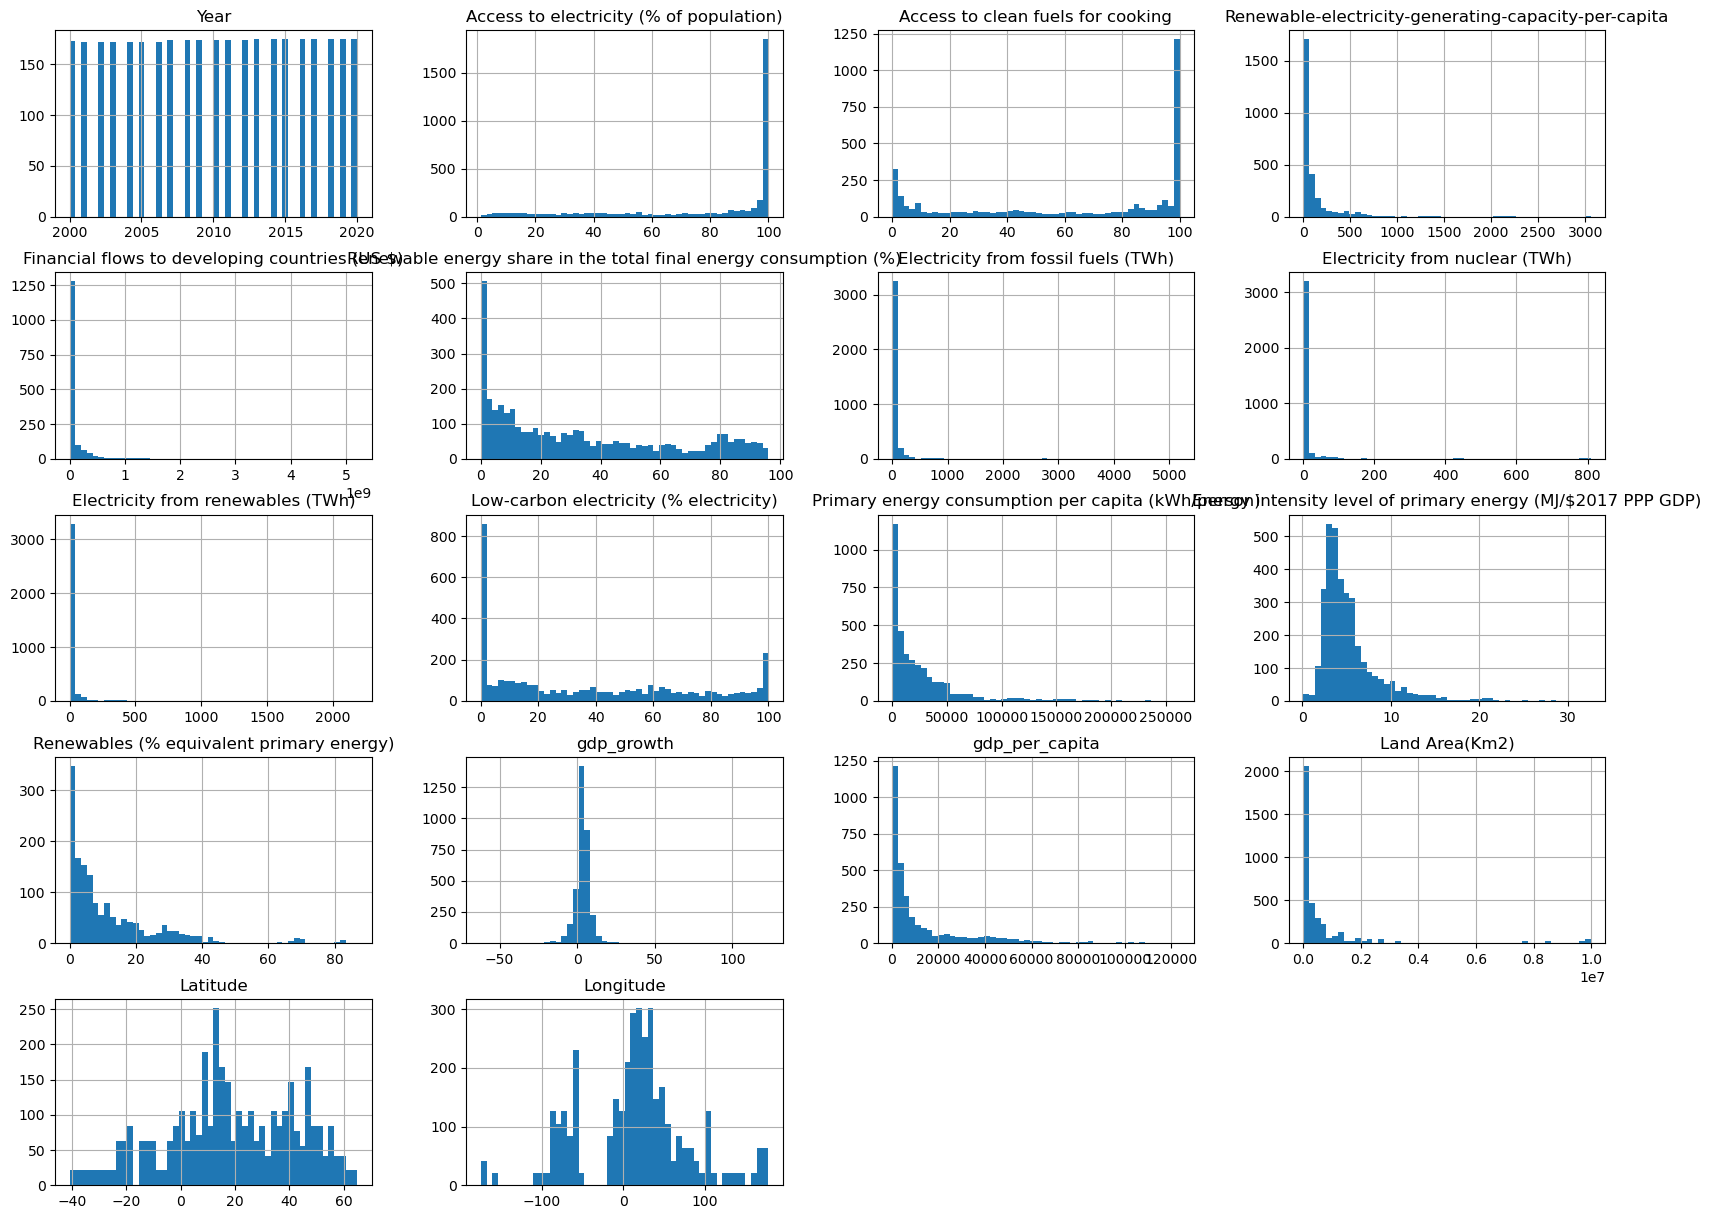

In [8]:
df[num_features].hist(bins=50, figsize=(20,15))
plt.show()

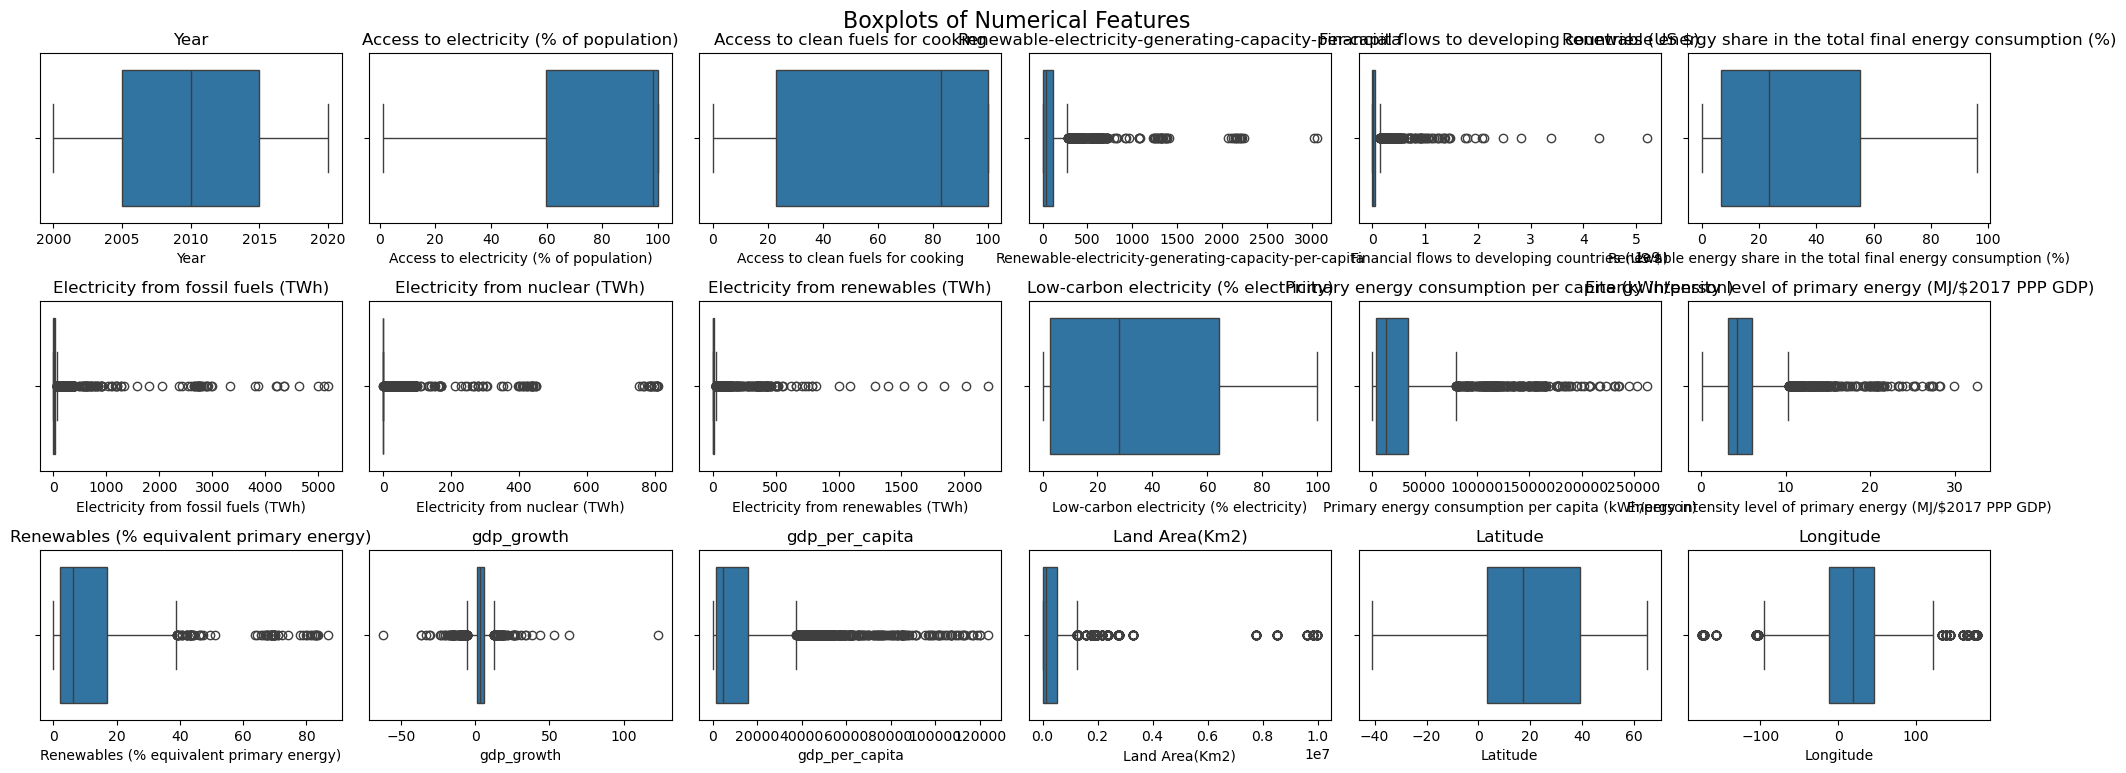

In [9]:
#box plt
plt.figure(figsize=(20,15))
for i, column in enumerate(df[num_features]):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(data=df[num_features], x=column)
    plt.title(column)
plt.suptitle("Boxplots of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1500x400 with 0 Axes>

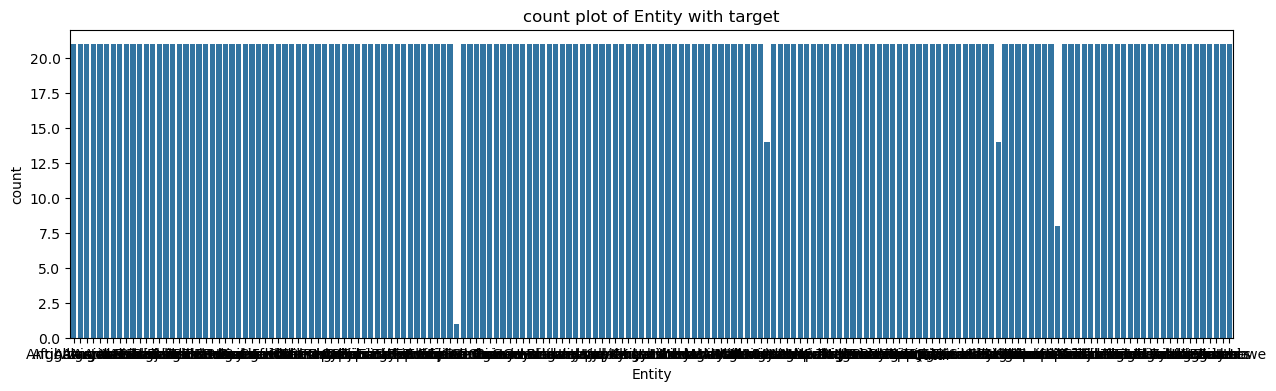

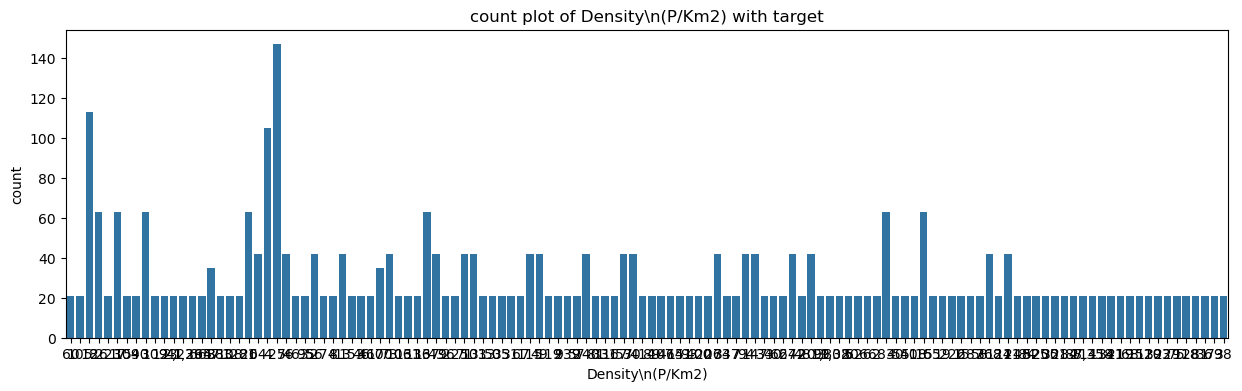

In [10]:
#categorical plt
plt.figure(figsize=(15,4))
for column in cat_features:
    plt.figure(figsize=(15,4))
    sns.countplot(data=df, x=column)
    plt.title(f"count plot of {column} with target")
    plt.show()

Correlation matrix of num features:


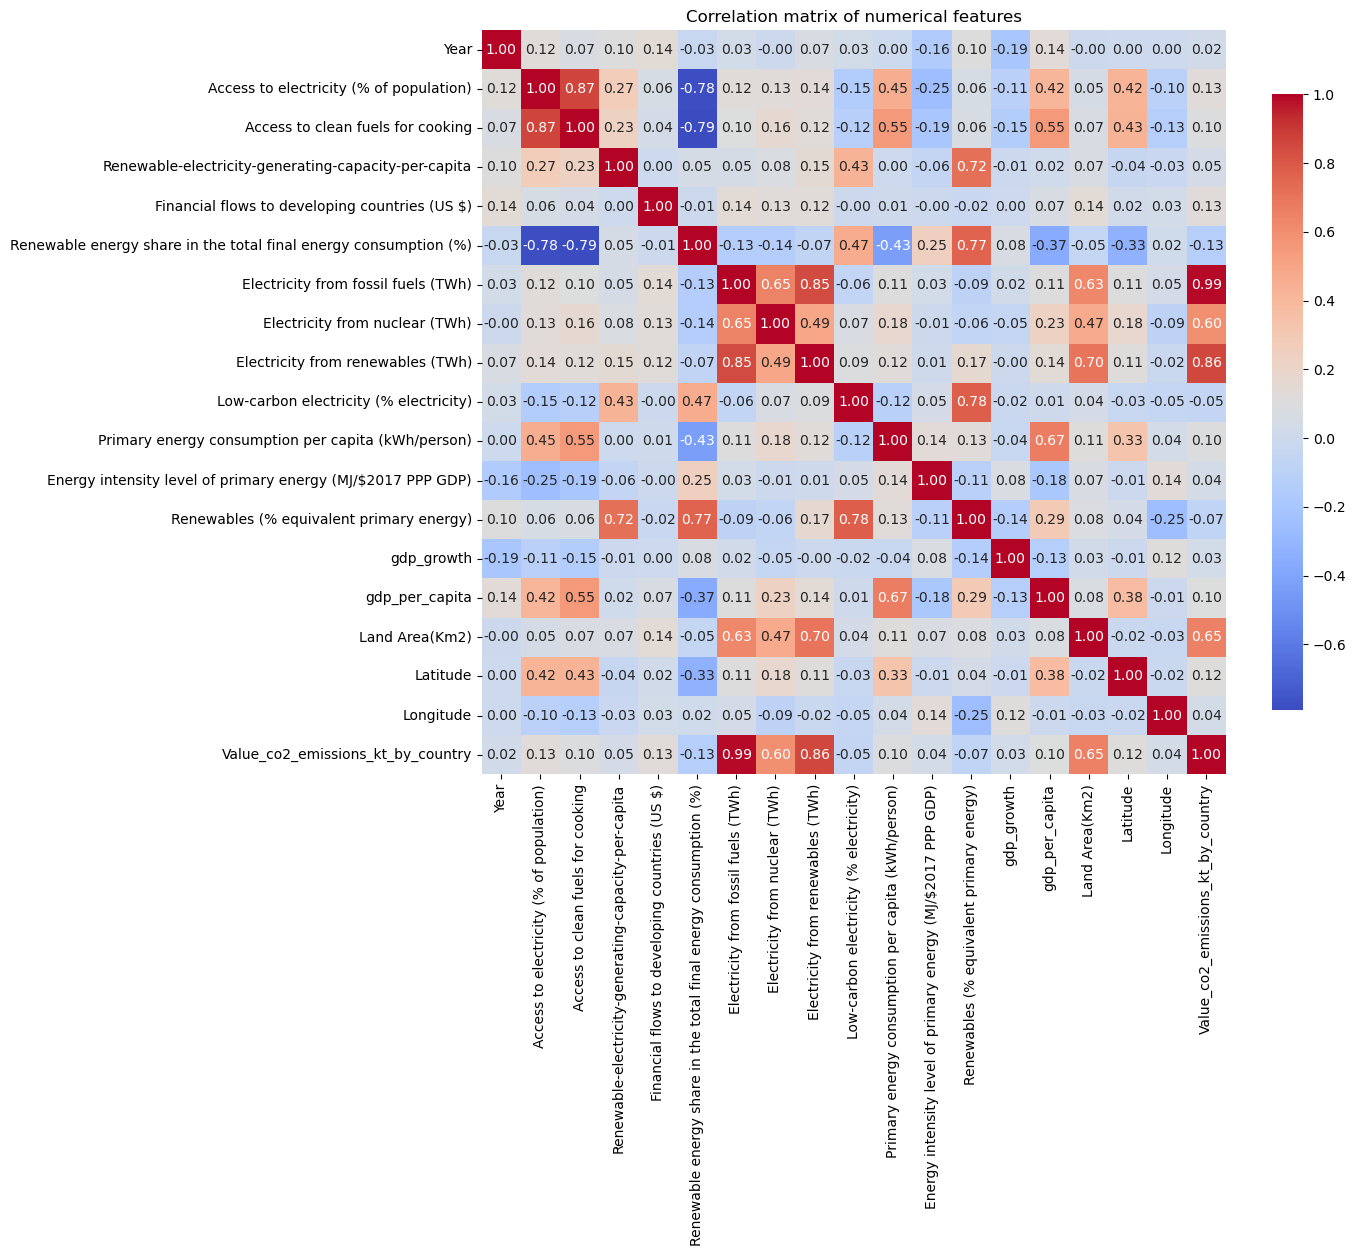

In [ ]:
print("Correlation matrix of num features:")
plt.figure(figsize=(12,10))
corr_matrix = df[num_features+["Value_co2_emissions_kt_by_country"]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation matrix of numerical features")
plt.show()

In [12]:
#data clean
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [13]:
df.shape

(3649, 21)

In [14]:
missing = df.isna().sum(axis=1)/df.shape[1]*100
missing.value_counts()

9.523810     1331
4.761905     1274
0.000000      343
23.809524     301
14.285714     182
19.047619     172
28.571429      29
33.333333      12
38.095238       3
57.142857       1
42.857143       1
Name: count, dtype: int64

In [15]:
#detect the missing value
missing_value = df.isnull().sum()
missing_value

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

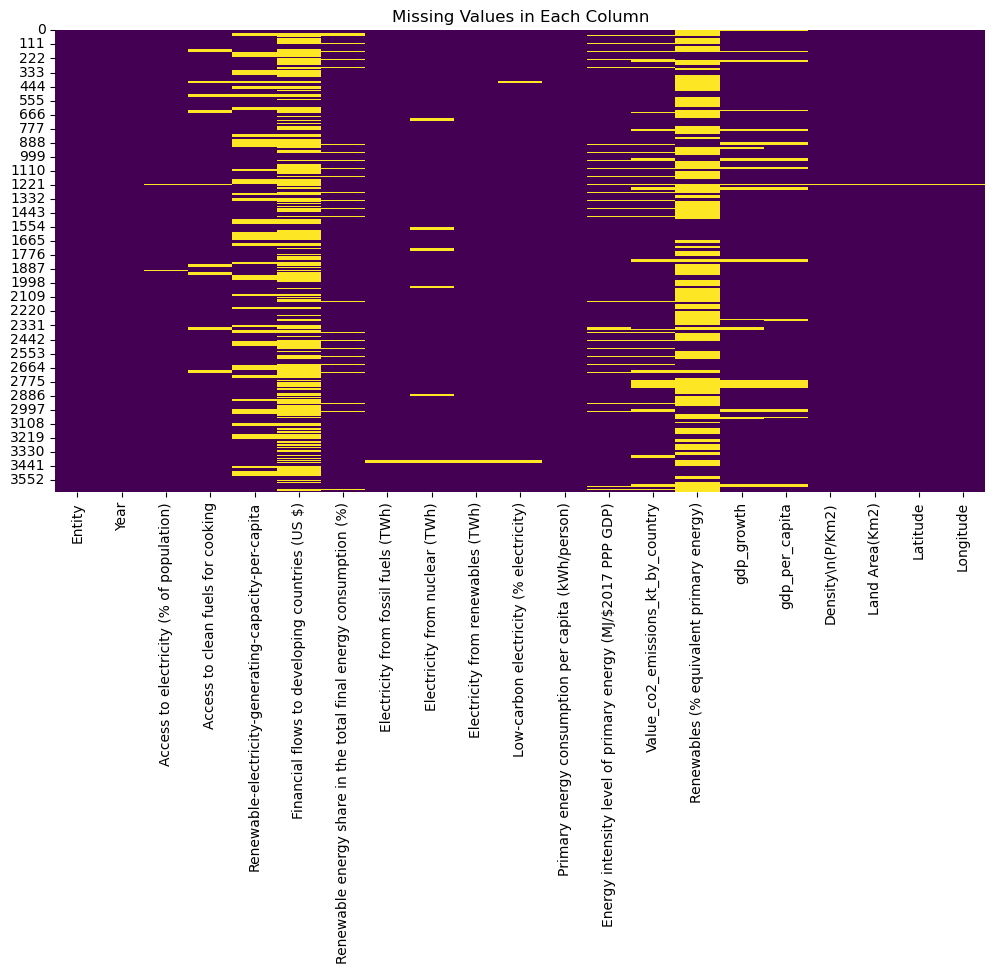

In [16]:
#visualize missing value
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Each Column')

plt.show()

In [17]:
missing_value = missing_value[missing_value > 0]
print(missing_value)
df.dropna()

Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                                    428
Renewables (% equivalent primary energy)                            2137
gdp_growth                                                           317
gdp_per_capita                                     

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
43,Algeria,2001,98.96687,97.30,8.79,810000.0,0.43,24.96,0.0,0.07,...,9961.640,4.07,78650.00000,0.065218,3.000000,1740.606654,18,2381741.0,28.033886,1.659626
44,Algeria,2002,98.95306,97.80,8.68,310000.0,0.51,25.94,0.0,0.06,...,10180.350,4.12,82400.00153,0.051677,5.600000,1781.828908,18,2381741.0,28.033886,1.659626
45,Algeria,2003,98.93401,98.00,8.57,90000.0,0.47,27.54,0.0,0.26,...,10510.461,4.08,88190.00244,0.228104,7.200000,2103.381291,18,2381741.0,28.033886,1.659626
46,Algeria,2004,98.91208,98.20,8.46,140000.0,0.44,29.14,0.0,0.25,...,10759.022,3.96,89489.99786,0.206787,4.300000,2610.185422,18,2381741.0,28.033886,1.659626
47,Algeria,2005,98.88961,98.50,8.34,160000.0,0.58,31.36,0.0,0.55,...,11113.723,3.90,94190.00244,0.434119,5.900000,3113.094883,18,2381741.0,28.033886,1.659626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,Uzbekistan,2015,100.00000,85.35,60.83,270000.0,1.71,47.55,0.0,7.00,...,17386.195,7.86,99169.99817,3.012993,7.218774,2753.971072,79,447400.0,41.377491,64.585262
3560,Uzbekistan,2016,100.00000,85.20,59.88,690000.0,1.61,48.75,0.0,7.25,...,16374.342,7.82,105230.00340,3.567936,5.932151,2704.677188,79,447400.0,41.377491,64.585262
3561,Uzbekistan,2017,100.00000,84.90,58.24,60130000.0,1.75,49.71,0.0,8.35,...,16642.676,7.88,109529.99880,3.972285,4.395275,1916.764642,79,447400.0,41.377491,64.585262
3562,Uzbekistan,2018,100.00000,84.30,59.09,84130000.0,1.49,53.58,0.0,5.85,...,16445.740,9.05,112470.00120,2.927033,5.354997,1597.068337,79,447400.0,41.377491,64.585262


In [18]:
df.isna().sum().sort_values()

Entity                                                                 0
Year                                                                   0
Primary energy consumption per capita (kWh/person)                     0
Land Area(Km2)                                                         1
Density\n(P/Km2)                                                       1
Latitude                                                               1
Longitude                                                              1
Access to electricity (% of population)                               10
Electricity from fossil fuels (TWh)                                   21
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Electricity from nuclear (TWh)                                       126
Access to clean fuels for cooking                                    169
Renewable energy share in the total final energy co

In [19]:
df.columns


Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [20]:
df.rename(columns={'Density\\n(P/Km2)': 'Density'}, inplace=True)



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [22]:
df



,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [23]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [24]:
#impute missing values for numerical features with the mean
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_features] = df[num_features].fillna(df[num_features].mean())
#verifying if missing value is imputed
print(df.isna().sum().sort_values())

Entity                                                              0
Land Area(Km2)                                                      0
gdp_per_capita                                                      0
gdp_growth                                                          0
Renewables (% equivalent primary energy)                            0
Value_co2_emissions_kt_by_country                                   0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Primary energy consumption per capita (kWh/person)                  0
Latitude                                                            0
Low-carbon electricity (% electricity)                              0
Electricity from nuclear (TWh)                                      0
Electricity from fossil fuels (TWh)                                 0
Renewable energy share in the total final energy consumption (%)    0
Financial flows to developing countries (US $)                      0
Renewable-electricit

In [25]:
# Clean column names: remove \n, spaces, and hidden characters
df.columns = df.columns.str.replace("\\n", "", regex=True)
df.columns = df.columns.str.strip()

# Verify the cleaned column names
print(df.columns.tolist())



['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density', 'Land Area(Km2)', 'Latitude', 'Longitude']


In [26]:
#impute missing values for categorical features with the mode
cat_features = df.select_dtypes(include=[object]).columns.tolist()
df[cat_features] = df[cat_features].fillna(df[cat_features].mode().iloc[0])
#verifying if missing value is imputed
print(df.isna().sum())

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equiva

In [27]:

cat_features

['Entity', 'Density']

In [28]:
#convert categorical data into numerical
num_features = df.select_dtypes(include=['int64','float64']).columns.tolist()


In [29]:
cat_features

['Entity', 'Density']

In [30]:
#exclude the target and non feature columns if present
#exclude the target and non feature columns if present
non_feature_cols = ['Value_co2_emissions_kt_by_country',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from renewables (TWh)']
num_features = [col for col in num_features if col not in non_feature_cols]
cat_features = [col for col in cat_features if col not in non_feature_cols]
cat_features

['Entity', 'Density']

In [31]:
#normalize of standerize numerical features
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
#convert categorical features
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
#combain transformer into a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])
#apply the transformations to the dataframe
df_preprocessed = preprocessor.fit_transform(df)
#which sahpe of transform data
print("Shape of preprocessed data:", df_preprocessed.shape)

Shape of preprocessed data: (3649, 316)


In [32]:
df_preprocessed

<3649x316 sparse matrix of type '<class 'numpy.float64'>'
	with 59809 stored elements in Compressed Sparse Row format>

In [33]:
#get feature names
num_features


['Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

In [34]:
#get feature names
numerical_features = num_features
categorical_features = preprocessor.named_transformers_["cat"]["onehot"].get_feature_names_out(cat_features)
all_features = numerical_features + list(categorical_features)
print(all_features)

['Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Land Area(Km2)', 'Latitude', 'Longitude', 'Entity_Afghanistan', 'Entity_Albania', 'Entity_Algeria', 'Entity_Angola', 'Entity_Antigua and Barbuda', 'Entity_Argentina', 'Entity_Armenia', 'Entity_Aruba', 'Entity_Australia', 'Entity_Austria', 'Entity_Azerbaijan', 'Entity_Bahamas', 'Entity_Bahrain', 'Entity_Bangladesh', 'Entity_Barbados', 'Entity_Belarus', 'Entity_Belgium', 'Entity_Belize', 'Entity_Benin', 'Entity_Bermuda', 'Entity_Bhutan', 'Entity_Bosnia and Herzegovina', 'Entity_Botswana', 'Ent

In [35]:
all_features

['Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Land Area(Km2)',
 'Latitude',
 'Longitude',
 'Entity_Afghanistan',
 'Entity_Albania',
 'Entity_Algeria',
 'Entity_Angola',
 'Entity_Antigua and Barbuda',
 'Entity_Argentina',
 'Entity_Armenia',
 'Entity_Aruba',
 'Entity_Australia',
 'Entity_Austria',
 'Entity_Azerbaijan',
 'Entity_Bahamas',
 'Entity_Bahrain',
 'Entity_Bangladesh',
 'Entity_Barbados',
 'Entity_Belarus',
 'Entity_Belgium',
 'Entity_Belize',
 'Entity_Benin',
 'Entity_Bermuda',
 'Entity_Bhutan',
 'Entity_Bosnia and 

In [39]:
print(type(df_preprocessed))
print(df_preprocessed.shape)


<class 'scipy.sparse._csr.csr_matrix'>
(3649, 316)


In [41]:
#co
df_preprocessed_dense = df_preprocessed.toarray()
df_preprocessed = pd.DataFrame(df_preprocessed_dense, columns=all_features)
df_preprocessed[non_feature_cols] = df[non_feature_cols].reset_index(drop=True)
df_preprocessed

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),...,Density_89,Density_9,Density_93,Density_94,Density_95,Density_96,Density_99,Value_co2_emissions_kt_by_country,Renewable energy share in the total final energy consumption (%),Electricity from renewables (TWh)
0,-1.658303,-2.557738,-1.496598,-0.493223,-0.483384,-0.202319,-0.187525,0.854719,-0.731738,-1.069235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,760.000000,44.99,0.31
1,-1.493106,-2.476329,-1.470367,-0.494932,-0.482819,-0.202521,-0.187525,1.405501,-0.733627,-1.040080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730.000000,45.60,0.50
2,-1.327910,-2.299862,-1.444137,-0.496783,-0.463218,-0.202406,-0.187525,1.300367,-0.734376,-1.139208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1029.999971,37.83,0.56
3,-1.162713,-2.123568,-1.410037,-0.498586,-0.350228,-0.201887,-0.187525,0.885906,-0.733826,-1.139208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1220.000029,36.66,0.63
4,-0.997517,-1.947369,-1.373314,-0.500200,0.000000,-0.201829,-0.187525,0.765716,-0.734567,-1.197520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1029.999971,44.24,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,0.984841,-1.203180,-0.877554,-0.238537,-0.483332,-0.192694,-0.187525,0.348239,-0.647607,1.368170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11020.000460,81.90,3.32
3645,1.150037,-1.149693,-0.877554,-0.241147,-0.454905,-0.193991,-0.187525,0.636203,-0.652200,1.225308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10340.000150,82.46,4.30
3646,1.315234,-1.103579,-0.874931,-0.145272,-0.483435,-0.192031,-0.187525,0.662851,-0.641443,1.318606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12380.000110,80.23,5.46
3647,1.480430,-1.063591,-0.869685,-0.150636,-0.482203,-0.192233,-0.187525,0.550577,-0.654051,1.505201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11760.000230,81.50,4.58


In [37]:
# Debug prints to check shapes and lengths before DataFrame conversion
print('Shape of df_preprocessed (array):', df_preprocessed.shape)
print('Length of all_features:', len(all_features))
print('Shape of df[non_feature_cols]:', df[non_feature_cols].shape)
print('Shape of df:', df.shape)

Shape of df_preprocessed (array): (3649, 316)
Length of all_features: 316
Shape of df[non_feature_cols]: (3649, 3)
Shape of df: (3649, 21)


In [42]:
df_preprocessed.to_csv("sustainable_energy_preprocessed.csv", index=False)